In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [2]:
# import required libraries

import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [3]:
# load data

data = []
labels = []
label_map = {
    "move_none": 0,
    "move_circle": 1,
    "move_shake": 2,
    "move_twist": 3
}

for label_name in os.listdir("motion_data"):
    for file in os.listdir(f"motion_data/{label_name}"):
            try:
                sample = np.load(f"motion_data/{label_name}/{file}")
            except Exception as e:
                print(f"Failed to load {label_name}/{file}")
                print(e)
            sample = sample.flatten()  # Shape: (300,)
            data.append(sample)
            labels.append(label_map[label_name])
    
        

X = np.array(data)
y = tf.keras.utils.to_categorical(labels, num_classes=4)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# fully connected model

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(300,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

E0000 00:00:1747313543.942353  291938 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1747313543.953554  291938 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:
# optimize the model
# making use of adam optimizer
# and cross entropy loss

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=1, epochs=15)

Epoch 1/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5096 - loss: 1.2562 - val_accuracy: 0.8158 - val_loss: 0.4263
Epoch 2/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9533 - loss: 0.2018 - val_accuracy: 0.9211 - val_loss: 0.4820
Epoch 3/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0695 - val_accuracy: 0.9211 - val_loss: 0.2980
Epoch 4/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0230 - val_accuracy: 0.8947 - val_loss: 0.2567
Epoch 5/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0126 - val_accuracy: 0.9211 - val_loss: 0.2444
Epoch 6/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 0.9211 - val_loss: 0.2412
Epoch 7/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 0.9211 - val_loss: 0.2487
Epoch 8/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 

In [6]:
# convert model to tensorflow lite

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("motion_model.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp1s54h_ep/assets


INFO:tensorflow:Assets written to: /tmp/tmp1s54h_ep/assets


Saved artifact at '/tmp/tmp1s54h_ep'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 300), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  136705526274656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136705526268144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136705526273424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136705526268496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136705526275888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136705526271136: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1747313574.798248  291938 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1747313574.798271  291938 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-05-15 14:52:54.798948: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp1s54h_ep
2025-05-15 14:52:54.799614: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-05-15 14:52:54.799627: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmp1s54h_ep
I0000 00:00:1747313574.803063  291938 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-05-15 14:52:54.803787: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-05-15 14:52:54.831506: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmp1s54h_ep
2025-05-15 14:52:54.838148: I tensorflow/cc/saved_model/loader.cc:471] SavedModel 

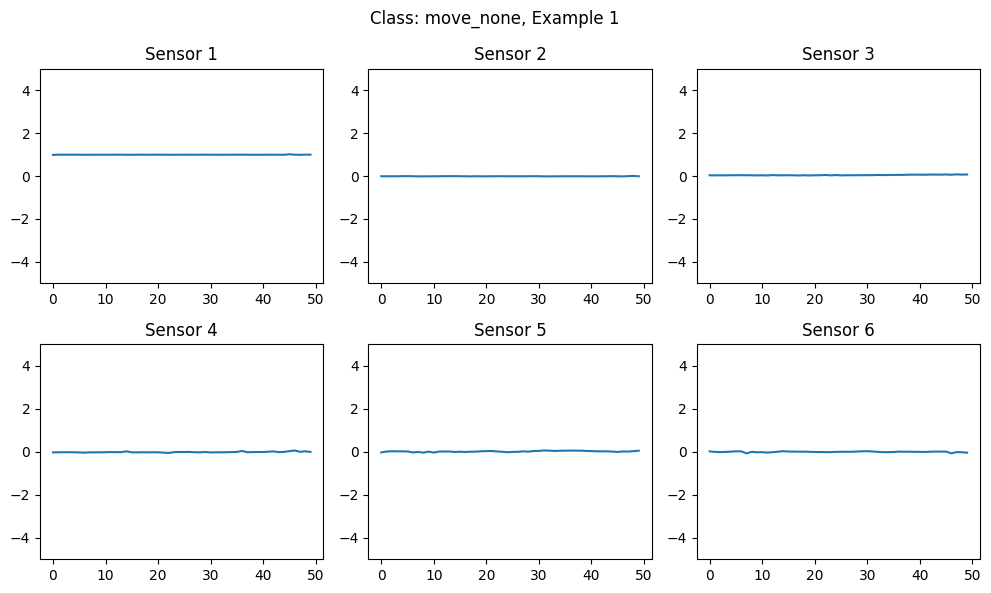

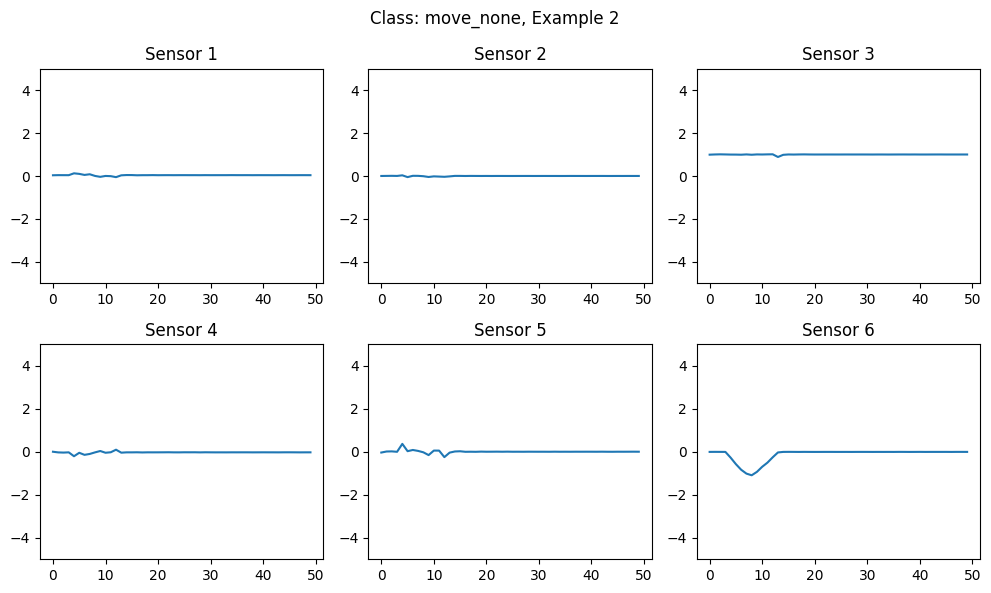

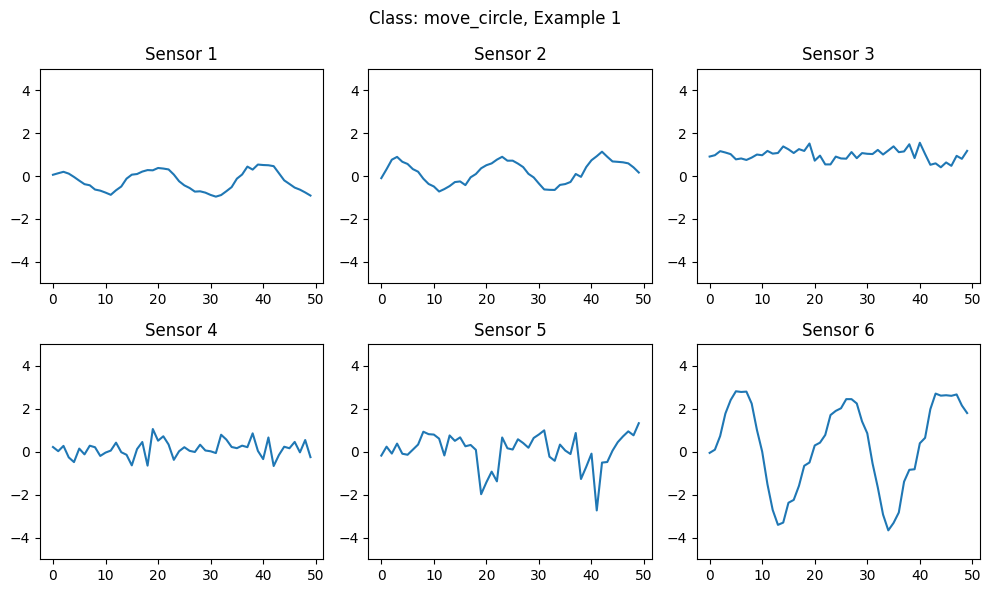

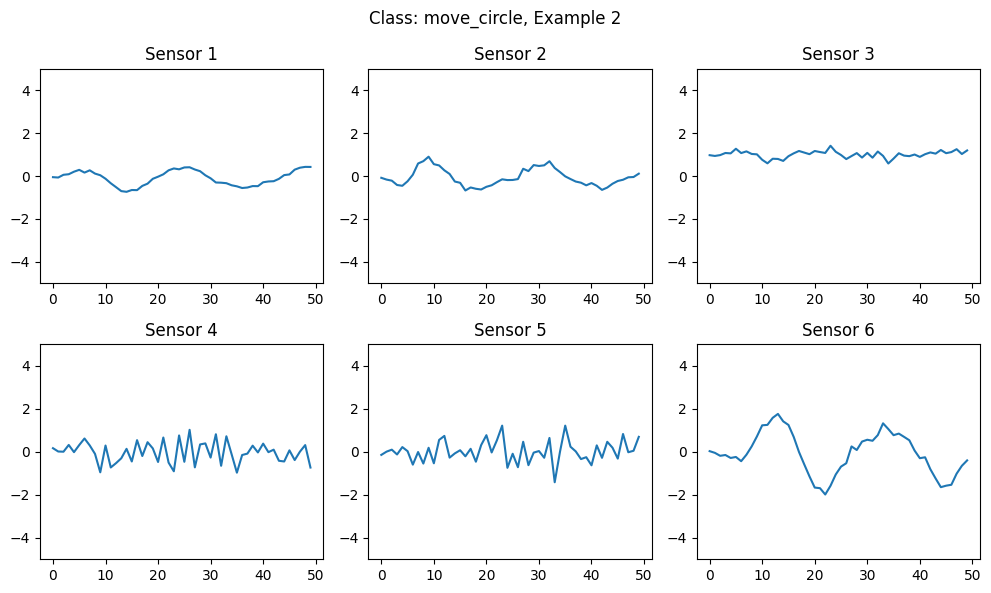

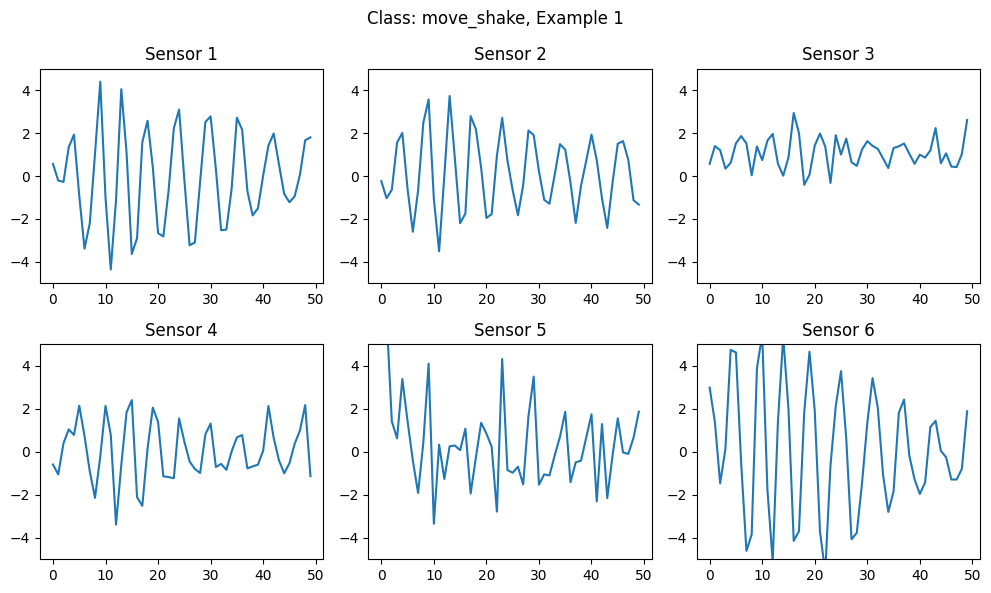

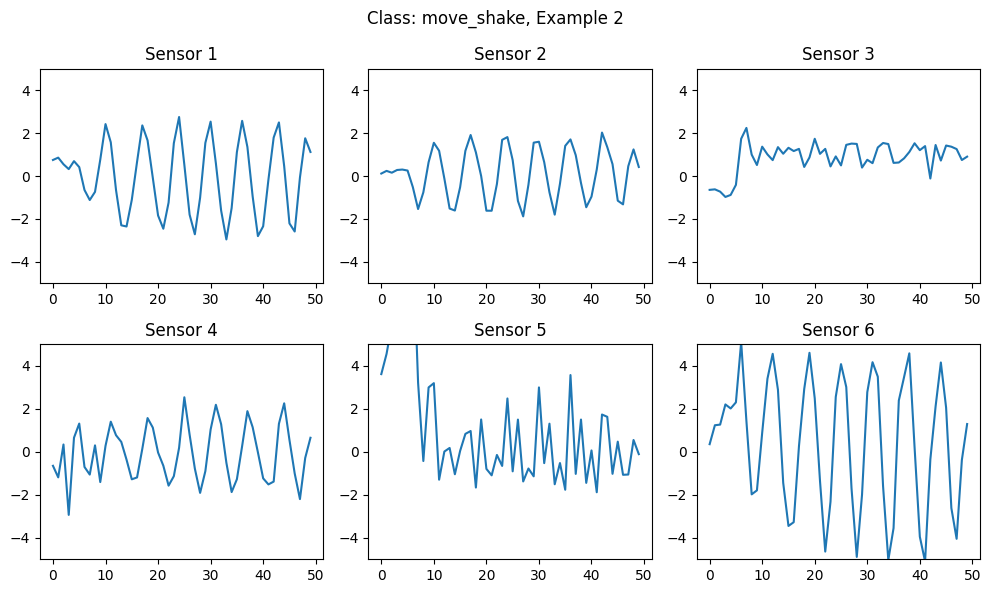

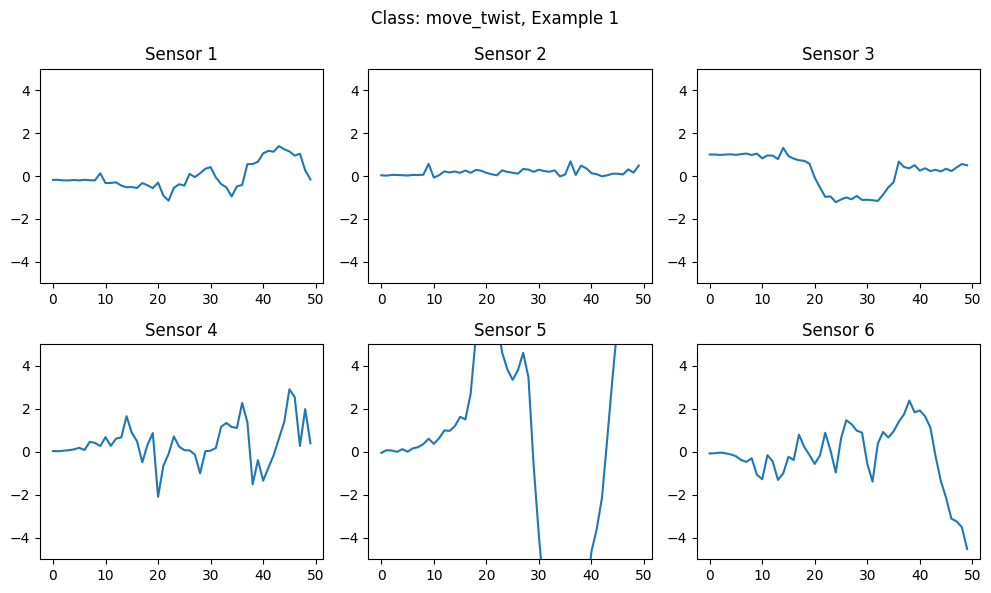

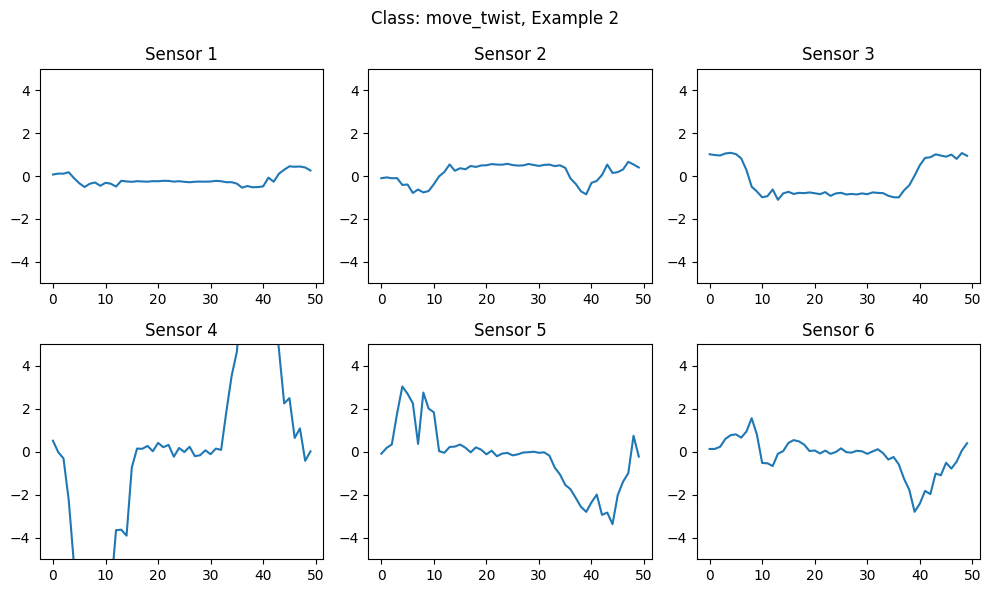

In [8]:
import matplotlib.pyplot as plt

num_examples_per_class = 2  # Number of examples to plot per class
y_min = -5
y_max = 5

label_map_inv = {0: "move_none", 1: "move_circle", 2: "move_shake", 3: "move_twist"}

for label in range(4):
    class_files = [f for f in os.listdir(f"motion_data/{label_map_inv[label]}") if f.endswith(".npy")]
    for i in range(min(num_examples_per_class, len(class_files))):
        file_path = f"motion_data/{label_map_inv[label]}/{class_files[i]}"
        sample = np.load(file_path)

        plt.figure(figsize=(10, 6))
        for j in range(6):
            plt.subplot(2, 3, j + 1)
            plt.plot(sample[:, j])
            plt.ylim(y_min, y_max)  # Set y-axis limits
            plt.title(f"Sensor {j+1}")
        plt.suptitle(f"Class: {label_map_inv[label]}, Example {i+1}")
        plt.tight_layout()
        plt.show()